<a href="https://colab.research.google.com/github/kphprateek/Recommender/blob/main/Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries and Loading Our Data<a id="1"></a> <br>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [ ]:
books=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/books.csv')
ratings=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/ratings.csv')
book_tags=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/book_tags.csv')
tags=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/tags.csv')

In [ ]:
books.head()

,0,1,2,3,4
id,1,2,3,4,5
book_id,2767052,3,41865,2657,4671
best_book_id,2767052,3,41865,2657,4671
work_id,2792775,4640799,3212258,3275794,245494
books_count,272,491,226,487,1356
isbn,439023483,439554934,316015849,61120081,743273567
isbn13,9.78044e+12,9.78044e+12,9.78032e+12,9.78006e+12,9.78074e+12
authors,Suzanne Collins,"J.K. Rowling, Mary GrandPré",Stephenie Meyer,Harper Lee,F. Scott Fitzgerald
original_publication_year,2008,1997,2005,1960,1925
original_title,The Hunger Games,Harry Potter and the Philosopher's Stone,Twilight,To Kill a Mockingbird,The Great Gatsby


In [ ]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [ ]:
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [ ]:
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


## *Books*

In [ ]:
books.shape

(10000, 23)

In [ ]:
books.describe()

,id,book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,9.415000e+03,9979.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,5000.50000,5.264697e+06,5.471214e+06,8.646183e+06,75.712700,9.755044e+12,1981.987674,4.002191,5.400124e+04,5.968732e+04,2919.955300,1345.040600,3110.885000,11475.893800,1.996570e+04,2.378981e+04
std,2886.89568,7.575462e+06,7.827330e+06,1.175106e+07,170.470728,4.428619e+11,152.576665,0.254427,1.573700e+05,1.678038e+05,6124.378132,6635.626263,9717.123578,28546.449183,5.144736e+04,7.976889e+04
min,1.00000,1.000000e+00,1.000000e+00,8.700000e+01,1.000000,1.951703e+08,-1750.000000,2.470000,2.716000e+03,5.510000e+03,3.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02
25%,2500.75000,4.627575e+04,4.791175e+04,1.008841e+06,23.000000,9.780316e+12,1990.000000,3.850000,1.356875e+04,1.543875e+04,694.000000,196.000000,656.000000,3112.000000,5.405750e+03,5.334000e+03
50%,5000.50000,3.949655e+05,4.251235e+05,2.719524e+06,40.000000,9.780452e+12,2004.000000,4.020000,2.115550e+04,2.383250e+04,1402.000000,391.000000,1163.000000,4894.000000,8.269500e+03,8.836000e+03
75%,7500.25000,9.382225e+06,9.636112e+06,1.451775e+07,67.000000,9.780831e+12,2011.000000,4.180000,4.105350e+04,4.591500e+04,2744.250000,885.000000,2353.250000,9287.000000,1.602350e+04,1.730450e+04
max,10000.00000,3.328864e+07,3.553423e+07,5.639960e+07,3455.000000,9.790008e+12,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

# Cleaning Data<a id="3"></a> <br>

## - Handle Missing Data<a id="4"></a> <br>

In [ ]:
null_columns=books.columns[books.isna().any()]
books[null_columns].isna().sum()

isbn               700
isbn13             585
original_title     585
language_code     1084
dtype: int64

In [ ]:
books.shape

(10000, 23)

In [ ]:
null_isbn = books[books.isbn.isna()==True].book_id
null_isbn.head()

105     9418327
120        7604
161       49552
187    10664113
202    11505797
Name: book_id, dtype: int64

In [ ]:
books=books.dropna()

#removing all missing data

In [ ]:
books.shape

(7865, 23)

## - Handle Duplicated Books<a id="8"></a> <br>

In [ ]:
f=books[books.title.duplicated(keep=False)==True].sort_values('title').transpose()

In [ ]:
f

,348,1291,6480,6104,578,5786,7448,5556,7461,3551,2147,5479,9149,9812,7022,3111,8898,9783,6454,4456,7024,3911,1259,5173,3130,8167,6021,4938,3471,6505,7683,1173,5616,7644,7399,4028,4211
id,349,1292,6481,6105,579,5787,7449,5557,7462,3552,2148,5480,9150,9813,7023,3112,8899,9784,6455,4457,7025,3912,1260,5174,3131,8168,6022,4939,3472,6506,7684,1174,5617,7645,7400,4029,4212
book_id,11590,5413,384597,11866694,197084,11566956,6345193,18656055,456,91953,44184,65684,17192373,97408,381489,7134202,119239,26599,112200,18225810,26506,2071575,7510,18668066,243705,47730,138134,22904,284996,4279056,59836,26893819,47076,2430,10866233,16240761,19101283
best_book_id,11590,5413,384597,11866694,197084,11566956,6345193,18656055,456,91953,44184,65684,17192373,97408,381489,7134202,119239,26599,112200,18225810,26506,2071575,7510,18668066,243705,47730,138134,22904,284996,4279056,59836,26893819,47076,2430,10866233,16240761,19101283
work_id,3048937,40802405,1303332,16823763,1837885,16507555,6448995,26470742,1128381,680963,1386643,1416661,23645580,93897,2764,7397180,1697235,1247207,471777,24902370,1008958,2076822,22576,26493730,1816452,46720,1701632,568437,886814,4326592,1912773,42856015,1007854,2758207,15781430,19110442,24342394
books_count,211,22,24,23,44,15,44,39,50,364,39,27,53,12,25,54,40,3,98,14,52,33,60,52,123,13,40,70,41,73,55,59,51,29,20,53,78
isbn,450031063,385516487,571169341,1401340873,1713221,618982507,805090800,316405345,140178139,140431950,64407314,1595541217,857520660,1571316515,1416918736,316096156,140424504,871401541,517206064,545540607,385340222,670018856,446612545,399171088,99470470,395957761,679601082,805210555,374515360,7284977,440221315,081299860X,316066346,515121495,545169178,62120395,385351372
isbn13,9.78045e+12,9.78039e+12,9.78057e+12,9.7814e+12,9.78e+12,9.78062e+12,9.78081e+12,9.78032e+12,9.78014e+12,9.78014e+12,9.78006e+12,9.7816e+12,9.78086e+12,9.78157e+12,9.78142e+12,9.78032e+12,9.78014e+12,9.78087e+12,9.78052e+12,9.78055e+12,9.78039e+12,9.78067e+12,9.78045e+12,9.7804e+12,9.7801e+12,9.7804e+12,9.78068e+12,9.78081e+12,9.78037e+12,9.78001e+12,9.78044e+12,9.78081e+12,9.78032e+12,9.78052e+12,9.78055e+12,9.78006e+12,9.78039e+12
authors,Stephen King,"Stephen King, Jerry N. Uelsmann",Tom Stoppard,Lauren Groff,P.D. Eastman,Alison Bechdel,Paul Auster,"James Patterson, David Ellis",Paul Auster,"Thomas Hobbes, C.B. Macpherson",Walter Dean Myers,Frank E. Peretti,Rachel Joyce,Natasha Friend,Kate Brian,"James Patterson, Maxine Paetro","George Gordon Byron, Peter J. Manning, Susan J...","E.E. Cummings, Richard S. Kennedy",Emily Dickinson,Raina Telgemeier,Danielle Steel,Jane Green,"James Patterson, Peter de Jonge",Nora Roberts,John Fowles,"Anne Sexton, Maxine Kumin",John Keats,"Franz Kafka, Nahum N. Glatzer, John Updike, Wi...",Flannery O'Connor,Cecelia Ahern,Danielle Steel,Emma Cline,Lori Lansens,Steve Martini,Siobhan Vivian,Philipp Meyer,"Jo Nesbø, Charlotte Barslund"
original_publication_year,1975,2005,1993,2012,1960,2012,2009,2014,1992,1651,1999,2005,2013,2004,2006,2010,1848,1994,1890,2014,2007,2008,2002,2014,1963,1981,1820,1946,1971,2008,1986,2016,2005,1997,2012,2012,2014
original_title,Salem's Lot,'Salem's Lot The Illustrated Edition,Arcadia,Arcadia,Are You My Mother?,Are You My Mother?: A Comic Drama,Invisible,Invisible,Leviathan,"Leviathan or The Matter, Forme and Power of a ...",Monster,Monster,Perfect,Perfect,Private,Private,Selected Poems,Selected Poems,Selected Poems of Emily Dickinson,Sisters,Sisters,The Beach House,The Beach House,The Collector,The Collector,The Complete Poems: Anne Sexton,John Keats : The Complete Poems,Sämtliche Erzählungen,The Complete Stories,The Gift,The Gift,The Girls,The Girls,The List,The List,The Son,Sønnen


In [ ]:
f.shape

(23, 37)

# Exploratory Data Analysis<a id="9"></a> <br>

## *Books*<a id="10"></a> <br>

In [ ]:
def plot_books_by(df, col, n_rows=10):
    plt.figure(figsize=(12,7))
    ax = sns.barplot(x=df[col].head(n_rows), y=df['title'].head(n_rows), data=df)
    plt.title('Best ' + str(n_rows) + ' books by ' + col.replace('_',' ').capitalize(), weight='bold')
    plt.xlabel('Score of ' + col)
    plt.ylabel('Book Title')    

In [ ]:
important_columns = ['title','authors','average_rating','ratings_count','work_text_reviews_count']

### Top Rated Books<a id="11"></a> <br>

In [ ]:
book_sorted_ratings = books[books['ratings_count']>=1000].sort_values('average_rating', ascending=False)
book_sorted_ratings[important_columns].head(15)

,title,authors,average_rating,ratings_count,work_text_reviews_count
3627,The Complete Calvin and Hobbes,Bill Watterson,4.82,28900,861
861,"Words of Radiance (The Stormlight Archive, #2)",Brandon Sanderson,4.77,73572,7261
8853,Mark of the Lion Trilogy,Francine Rivers,4.76,9081,731
4482,It's a Magical World: A Calvin and Hobbes Coll...,Bill Watterson,4.75,22351,264
6360,There's Treasure Everywhere: A Calvin and Hobb...,Bill Watterson,4.74,16766,149
421,"Harry Potter Boxset (Harry Potter, #1-7)",J.K. Rowling,4.74,190050,6508
6589,The Authoritative Calvin and Hobbes: A Calvin ...,Bill Watterson,4.73,16087,425
3752,"Harry Potter Collection (Harry Potter, #1-6)",J.K. Rowling,4.73,24618,882
6919,The Indispensable Calvin and Hobbes,Bill Watterson,4.73,14597,325
9565,Attack of the Deranged Mutant Killer Monster S...,Bill Watterson,4.72,9713,233


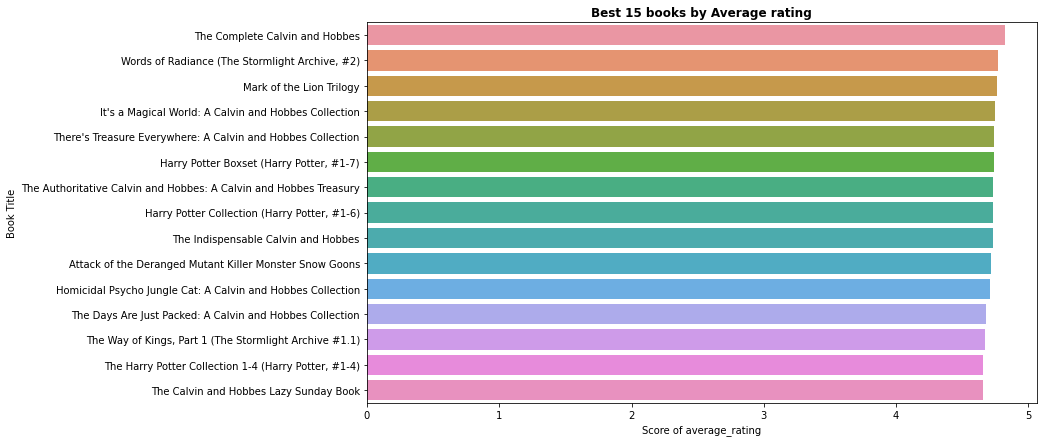

In [ ]:
plot_books_by(book_sorted_ratings, 'average_rating', 15)

### Top Popular Books<a id="12"></a> <br>

In [ ]:
book_sorted_ratings_count = books.sort_values('ratings_count', ascending=False)
book_sorted_ratings_count[important_columns].head(15)

,title,authors,average_rating,ratings_count,work_text_reviews_count
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.34,4780653,155254
1,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré",4.44,4602479,75867
2,"Twilight (Twilight, #1)",Stephenie Meyer,3.57,3866839,95009
3,To Kill a Mockingbird,Harper Lee,4.25,3198671,72586
4,The Great Gatsby,F. Scott Fitzgerald,3.89,2683664,51992
5,The Fault in Our Stars,John Green,4.26,2346404,140739
6,The Hobbit,J.R.R. Tolkien,4.25,2071616,37653
7,The Catcher in the Rye,J.D. Salinger,3.79,2044241,44920
9,Pride and Prejudice,Jane Austen,4.24,2035490,49152
8,"Angels & Demons (Robert Langdon, #1)",Dan Brown,3.85,2001311,25112


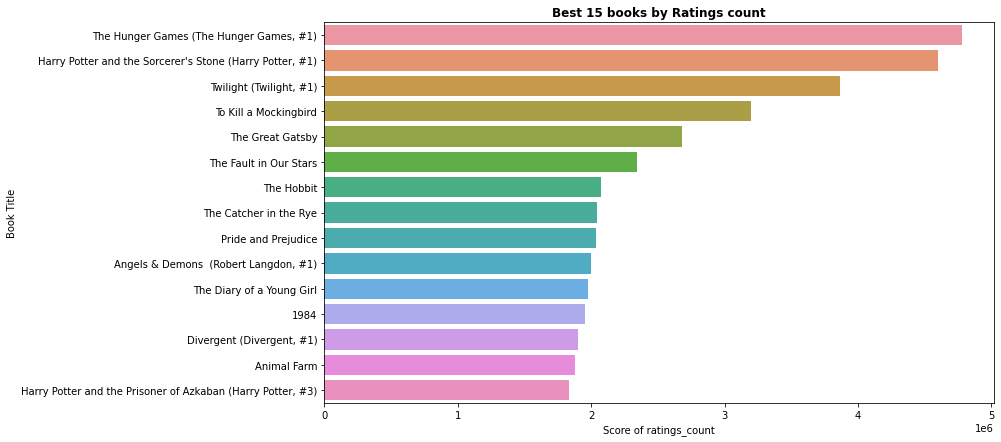

In [ ]:
plot_books_by(book_sorted_ratings_count, 'ratings_count', 15)

### Top Text-Reviewed Books<a id="13"></a> <br>

In [ ]:
book_sorted_reviews_count = books[books['ratings_count']>=1000].sort_values('work_text_reviews_count', ascending=False)
book_sorted_reviews_count[important_columns].head(15)

,title,authors,average_rating,ratings_count,work_text_reviews_count
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.34,4780653,155254
5,The Fault in Our Stars,John Green,4.26,2346404,140739
29,Gone Girl,Gillian Flynn,4.03,512475,121614
11,"Divergent (Divergent, #1)",Veronica Roth,4.24,1903563,101023
19,"Mockingjay (The Hunger Games, #3)",Suzanne Collins,4.03,1719760,96274
2,"Twilight (Twilight, #1)",Stephenie Meyer,3.57,3866839,95009
46,The Book Thief,Markus Zusak,4.36,1159741,93611
60,The Girl on the Train,Paula Hawkins,3.88,1008778,93600
16,"Catching Fire (The Hunger Games, #2)",Suzanne Collins,4.30,1831039,88538
30,The Help,Kathryn Stockett,4.45,1531753,78204


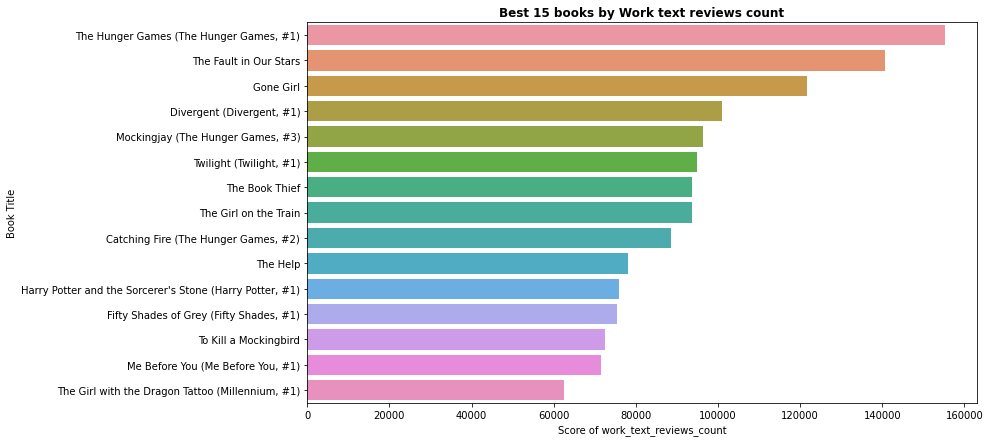

In [ ]:
plot_books_by(book_sorted_reviews_count, 'work_text_reviews_count', 15)

### Top Scored Books<a id="14"></a> <br>

We try some *feature-engineering* to come with new features.

We will create a new scorer for books by combining `average_rating` & `ratings_count` with 
ratios **0.5** : **0.5**, and you can play with them.



In [ ]:
from sklearn.preprocessing import MinMaxScaler

We need to normalize `average_rating` & `ratings_count` to have the same scale.

In [ ]:
cols = ['ratings_count','average_rating']
scaler = MinMaxScaler()
df_normalized = books[important_columns].copy()
df_normalized[cols] = scaler.fit_transform(df_normalized[cols])

In [ ]:
df_normalized.head()

,title,authors,average_rating,ratings_count,work_text_reviews_count
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,0.795745,1.000000,155254
1,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré",0.838298,0.962709,75867
2,"Twilight (Twilight, #1)",Stephenie Meyer,0.468085,0.808741,95009
3,To Kill a Mockingbird,Harper Lee,0.757447,0.668895,72586
4,The Great Gatsby,F. Scott Fitzgerald,0.604255,0.561105,51992


In [ ]:
df_normalized['book_score'] = 0.5 * df_normalized['ratings_count'] + 0.5 * df_normalized['average_rating']

In [ ]:
df_normalized_sorted_score = df_normalized.sort_values('book_score', ascending=False)
df_normalized_sorted_score.head()

,title,authors,average_rating,ratings_count,work_text_reviews_count,book_score
1,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré",0.838298,0.962709,75867,0.900503
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,0.795745,1.000000,155254,0.897872
3,To Kill a Mockingbird,Harper Lee,0.757447,0.668895,72586,0.713171
2,"Twilight (Twilight, #1)",Stephenie Meyer,0.468085,0.808741,95009,0.638413
24,Harry Potter and the Deathly Hallows (Harry Po...,"J.K. Rowling, Mary GrandPré",0.910638,0.364974,51942,0.637806


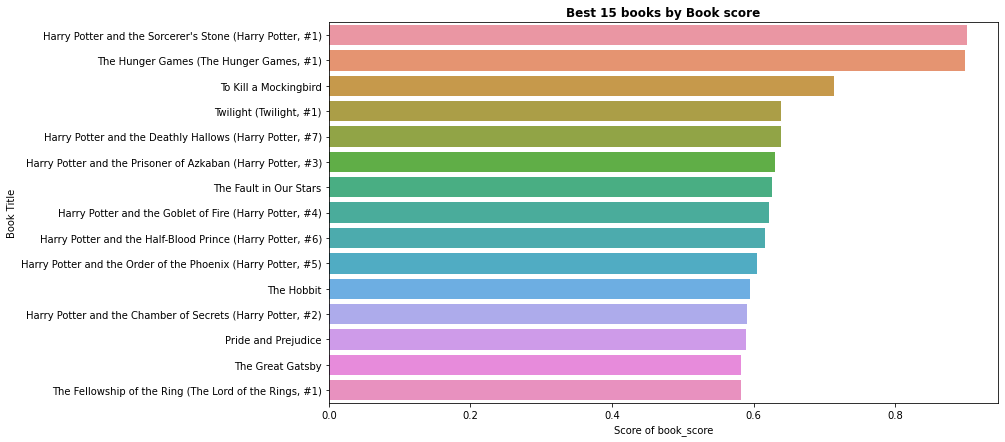

In [ ]:
plot_books_by(df_normalized_sorted_score, 'book_score', 15)

It's obvious that *Harry Potter* books appear several times in best 15 books.

In [ ]:
lang_counts = pd.DataFrame(books['language_code'].value_counts())
lang_counts.columns = ['counts']
lang_counts

,counts
eng,5561
en-US,1941
en-GB,215
en-CA,49
fre,22
spa,19
ger,13
ind,8
ara,6
jpn,6


In [ ]:
len(lang_counts)

23

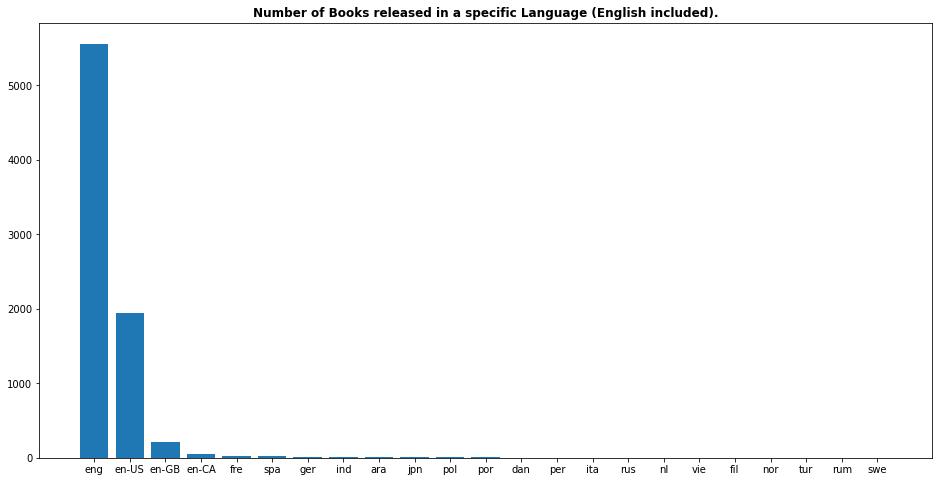

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Number of Books released in a specific Language (English included).", weight='bold')
plt.bar(x=lang_counts.index,height='counts', data=lang_counts);

In [ ]:
lang_counts = lang_counts.drop(["en-US", "en-GB", "eng", "en-CA"])

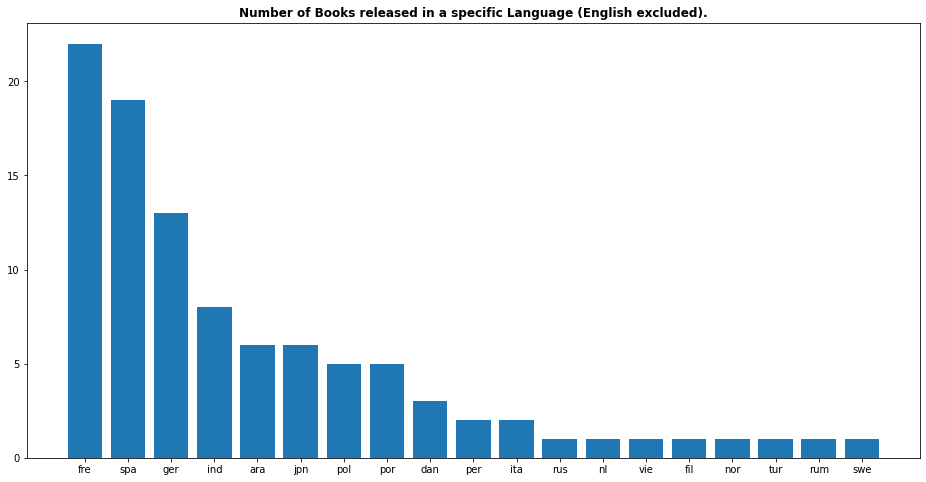

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Number of Books released in a specific Language (English excluded).", weight='bold')
plt.bar(x=lang_counts.index,height='counts', data=lang_counts);

## *Authors*<a id="18"></a> <br>

### Filter Authors<a id="19"></a> <br>

In [ ]:
books.authors.value_counts()

Nora Roberts                                                                               58
Stephen King                                                                               53
Terry Pratchett                                                                            40
Agatha Christie                                                                            38
Dean Koontz                                                                                34
                                                                                           ..
Brian Sibley                                                                                1
Brian Azzarello, Cliff Chiang, Tony Akins, Dan Green, Matthew Wilson, Jared K. Fletcher     1
Marion Zimmer Bradley                                                                       1
William  Kennedy                                                                            1
Jean Sasson                                                 

In [ ]:
c = []
books.authors.apply(lambda x: c.append(x) if 'Agatha Christie' in x else [])
c

['Agatha Christie',
 'Agatha Christie, Ροζίτα Σώκου',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Mary Westmacott, Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie',
 'Agatha Christie, Hugh Fraser',
 'Agatha Christie, Robin Bailey',
 'Agatha Christie']

In [ ]:
print('The real number of books (int the data) for Agatha Christie is {} not {}.'.format(len(c),books.authors.value_counts()['Agatha Christie']))

The real number of books (int the data) for Agatha Christie is 42 not 38.


In [ ]:
a = []
books.authors.apply(lambda x: a.append(x) if ',' in x else [])
a[:10]

['J.K. Rowling, Mary GrandPré',
 'George Orwell, Erich Fromm, Celâl Üster',
 'Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-Doubleday',
 'Stieg Larsson, Reg Keeland',
 'J.K. Rowling, Mary GrandPré, Rufus Beck',
 'J.K. Rowling, Mary GrandPré',
 'J.K. Rowling, Mary GrandPré',
 'J.K. Rowling, Mary GrandPré',
 'J.K. Rowling, Mary GrandPré',
 'J.K. Rowling, Mary GrandPré']

In [ ]:
print('Number of books with multi-authors is {}.'.format(len(a)))

Number of books with multi-authors is 1667.


In [ ]:
authors_list = books['authors'].apply(lambda x: [a for a in x.split(', ')] if ',' in x else x)
authors_list.head()

0                  Suzanne Collins
1    [J.K. Rowling, Mary GrandPré]
2                  Stephenie Meyer
3                       Harper Lee
4              F. Scott Fitzgerald
Name: authors, dtype: object

In [ ]:
authors_list.head(6).apply(lambda x: pd.Series(x)).stack().head(6)

0  0        Suzanne Collins
1  0           J.K. Rowling
   1          Mary GrandPré
2  0        Stephenie Meyer
3  0             Harper Lee
4  0    F. Scott Fitzgerald
dtype: object

In [ ]:
authors_list.head(6).apply(lambda x: pd.Series(x)).stack().head(6).reset_index(level=1, drop=True)

0        Suzanne Collins
1           J.K. Rowling
1          Mary GrandPré
2        Stephenie Meyer
3             Harper Lee
4    F. Scott Fitzgerald
dtype: object

In [ ]:
splitted_authors = authors_list.apply(lambda x: pd.Series(x)).stack().reset_index(level=1, drop=True)
splitted_authors.name = 'authors'
splitted_authors.head()

0    Suzanne Collins
1       J.K. Rowling
1      Mary GrandPré
2    Stephenie Meyer
3         Harper Lee
Name: authors, dtype: object

In [ ]:
df_edited_authors = books[important_columns].drop('authors', axis=1).join(splitted_authors)
df_edited_authors.head()

,title,average_rating,ratings_count,work_text_reviews_count,authors
0,"The Hunger Games (The Hunger Games, #1)",4.34,4780653,155254,Suzanne Collins
1,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,75867,J.K. Rowling
1,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,75867,Mary GrandPré
2,"Twilight (Twilight, #1)",3.57,3866839,95009,Stephenie Meyer
3,To Kill a Mockingbird,4.25,3198671,72586,Harper Lee


In [ ]:
books.shape, df_edited_authors.shape

((7865, 23), (10514, 5))

In [ ]:
df_edited_authors.authors.value_counts()

Stephen King        85
James Patterson     81
Nora Roberts        63
Dean Koontz         50
Terry Pratchett     46
                    ..
Soumei Hoshino       1
Per Petterson        1
Ed Helms             1
Michael Swanwick     1
Jean Sasson          1
Name: authors, Length: 4809, dtype: int64

We can see now the difference as the previous largest number of books was **60** for *Stephen King*, now it's **98** for *James Patterson*.

In [ ]:
def plot_authors_by(df, title, xlabel, n=15, ylabel='Author', y_size=7):
    plt.figure(figsize=(15,y_size))
    ax = sns.barplot(x=df.head(n).values, y=df.head(n).index)
    plt.title(title, weight='bold')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

### Authors with Most Books<a id="20"></a> <br>

In [ ]:
authors_most_with_books = df_edited_authors.authors.value_counts()
authors_most_with_books.head(15)

Stephen King           85
James Patterson        81
Nora Roberts           63
Dean Koontz            50
Terry Pratchett        46
Agatha Christie        42
J.D. Robb              40
Neil Gaiman            40
Janet Evanovich        33
Meg Cabot              33
David Baldacci         31
Anne Rice              30
Laurell K. Hamilton    30
John Grisham           27
Michael Connelly       27
Name: authors, dtype: int64

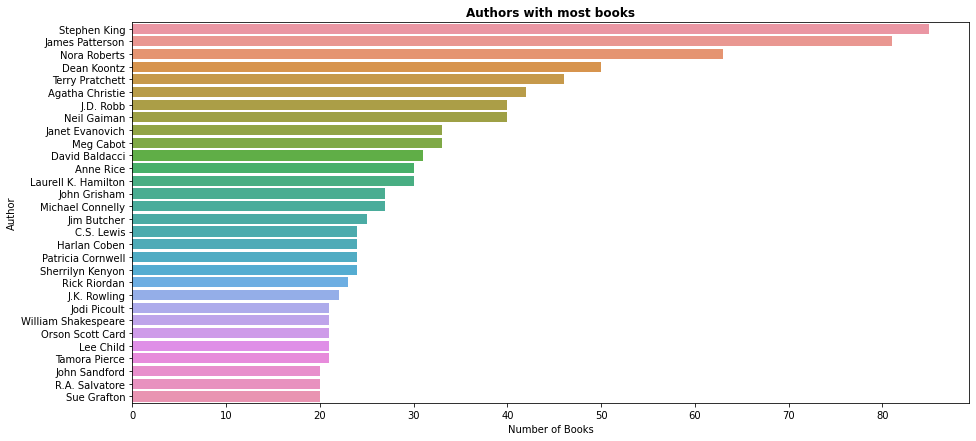

In [ ]:
plot_authors_by(authors_most_with_books, 'Authors with most books', 'Number of Books', 30)

For coming analysis we need to filter authors by their *number of books* & *total ratings count*, as for an author (with just one book and few ratings of **5**), won't be the same for a popular author with avrage-rating of maybe **4.5**.

In [ ]:
def at_least_books(df, n):
    more_than_n = df_edited_authors['authors'].value_counts().values >= n
    return df['authors'].isin(df['authors'].value_counts()[more_than_n == True].index)

In [ ]:
def at_least_ratings_count(df, n):
    return df.ratings_count >= n

In [ ]:
at_least_books(df_edited_authors, 5).head()

0     True
1     True
1     True
2     True
3    False
Name: authors, dtype: bool

In [ ]:
at_least_ratings_count(df_edited_authors, 10000).head()

0    True
1    True
1    True
2    True
3    True
Name: ratings_count, dtype: bool

Here we do some analysis trying to pick up suitable parameters for functions above.

In [ ]:
df_edited_authors['authors'].value_counts().describe()

count    4809.000000
mean        2.186317
std         3.635168
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        85.000000
Name: authors, dtype: float64

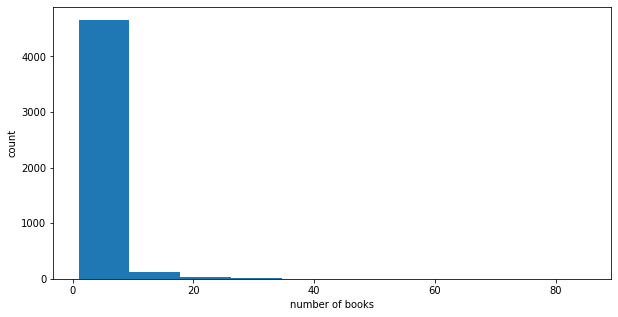

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(df_edited_authors.authors.value_counts().values);
plt.xlabel('number of books');
plt.ylabel('count');

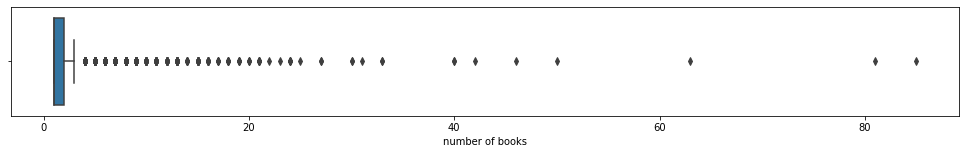

In [ ]:
plt.figure(figsize=(17,2))
sns.boxplot(x=df_edited_authors.authors.value_counts(), orient='h');
plt.xlabel('number of books');

In [ ]:
df_edited_authors['ratings_count'].describe()

count    1.051400e+04
mean     6.103485e+04
std      1.769463e+05
min      2.773000e+03
25%      1.398175e+04
50%      2.222900e+04
75%      4.519050e+04
max      4.780653e+06
Name: ratings_count, dtype: float64

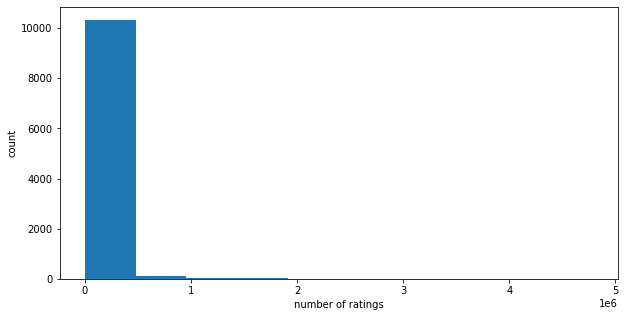

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(df_edited_authors['ratings_count']);
plt.xlabel('number of ratings');
plt.ylabel('count');

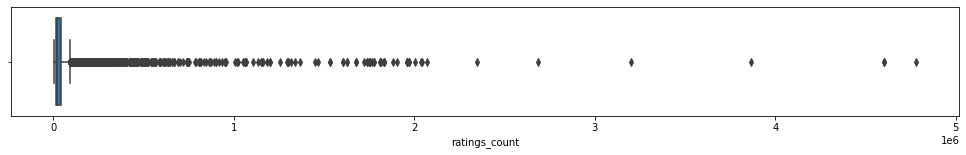

In [ ]:
plt.figure(figsize=(17,2))
sns.boxplot(x=df_edited_authors['ratings_count'], orient='h');

I've chosen at least **5** books and **50k** ratings for a successful author. You can play with different values and explore the results.

In [ ]:
c1 = at_least_books(df_edited_authors, 5)
c2 = at_least_ratings_count(df_edited_authors, 50000)

### Best Rating Authors<a id="21"></a> <br>

In [ ]:
best_rating_authors = df_edited_authors[c1 & c2].groupby('authors')['average_rating'].mean().sort_values(ascending=False)
best_rating_authors.head(15)

authors
Bill Watterson        4.630000
Francine Rivers       4.600000
Mary GrandPré         4.497143
Sarah J. Maas         4.468750
Clive Barker          4.440000
Takeshi Obata         4.420000
Tsugumi Ohba          4.420000
Fiona Staples         4.410000
George R.R. Martin    4.410000
Brandon Sanderson     4.409000
Cassandra Clare       4.366364
Robert Kirkman        4.365000
Bisco Hatori          4.360000
Richelle Mead         4.350000
A.A. Milne            4.350000
Name: average_rating, dtype: float64

In [ ]:
print('Best Rating Authors are {} of {} authors'.format(len(best_rating_authors),len(df_edited_authors.authors.unique())))

Best Rating Authors are 328 of 4809 authors


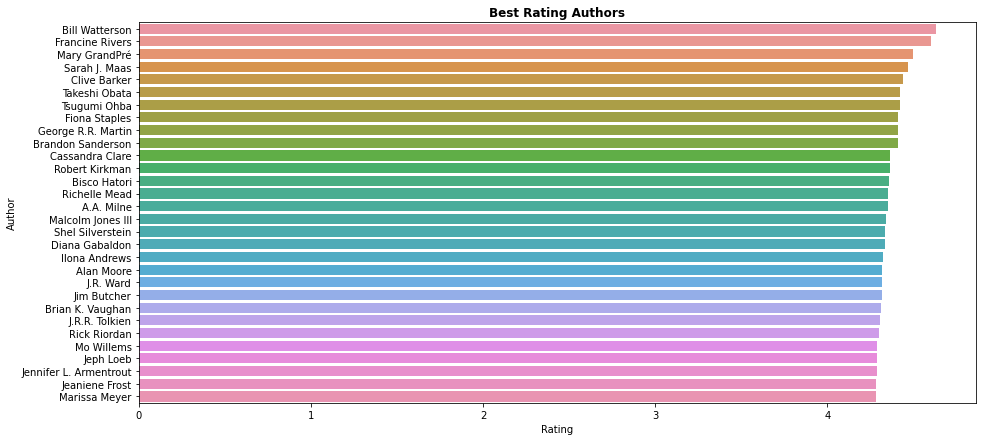

In [ ]:
plot_authors_by(best_rating_authors, 'Best Rating Authors', 'Rating', 30)

### Most Ratings Authors<a id="22"></a> <br>

In [ ]:
most_ratings_authors = df_edited_authors.groupby('authors')['ratings_count'].sum().sort_values(ascending=False)
most_ratings_authors.head(15)

authors
J.K. Rowling           16986979
Mary GrandPré          15172370
Suzanne Collins         8613107
Stephenie Meyer         8240392
Stephen King            8045593
J.R.R. Tolkien          5700179
Rick Riordan            5127987
Dan Brown               4984049
William Shakespeare     4393865
Cassandra Clare         4294099
Nicholas Sparks         4274745
John Green              4198002
Jane Austen             4151071
George Orwell           4035503
C.S. Lewis              3943519
Name: ratings_count, dtype: int64

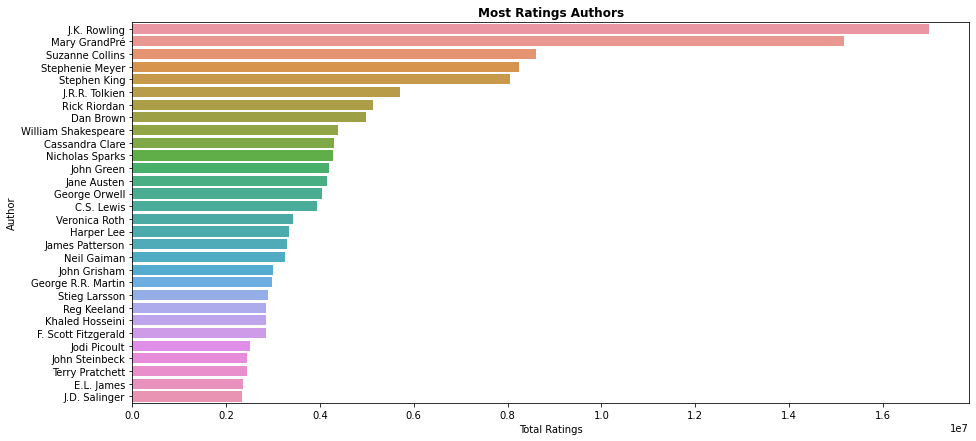

In [ ]:
plot_authors_by(most_ratings_authors, 'Most Ratings Authors', 'Total Ratings', 30)

We notice here that **Mary GrandPré** achieved the 2nd place, although that she isn't an author, but the illustrator of the *Harry Potter* books in their U.S. editions.

### Best Authors<a id="23"></a> <br>

We will do some *feature-engineering* (as before with books) to create a new scorer for authors.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
best_rating_authors_normalized = pd.DataFrame(best_rating_authors.values, index=best_rating_authors.index, columns=['rating'])
best_rating_authors_normalized['rating'] = scaler.fit_transform(best_rating_authors_normalized)
best_rating_authors_normalized.head()

,rating
authors,
Bill Watterson,1.000000
Francine Rivers,0.978873
Mary GrandPré,0.906439
Sarah J. Maas,0.886444
Clive Barker,0.866197


In [ ]:
authors_rating_score = df_edited_authors['authors'].apply(lambda x: best_rating_authors_normalized.loc[x].rating if x in best_rating_authors_normalized.index else 0.0)
authors_rating_score.head()

0    0.718310
1    0.696303
1    0.906439
2    0.301643
3    0.000000
Name: authors, dtype: float64

In [ ]:
most_ratings_authors_normalized = pd.DataFrame(most_ratings_authors.values, index=most_ratings_authors.index, columns=['total_rating'])
most_ratings_authors_normalized['total_rating'] = scaler.fit_transform(most_ratings_authors_normalized)
most_ratings_authors_normalized.head()

,total_rating
authors,
J.K. Rowling,1.000000
Mary GrandPré,0.893159
Suzanne Collins,0.506961
Stephenie Meyer,0.485016
Stephen King,0.473547


In [ ]:
authors_ratings_count_score = df_edited_authors['authors'].apply(lambda x: most_ratings_authors_normalized.loc[x].total_rating)
authors_ratings_count_score.head()

0    0.506961
1    1.000000
1    0.893159
2    0.485016
3    0.196333
Name: authors, dtype: float64

In [ ]:
df_edited_authors['author_score'] = 0.5 * authors_rating_score + 0.5 * authors_ratings_count_score
df_edited_authors['author_score'].head()

0    0.612636
1    0.848151
1    0.899799
2    0.393330
3    0.098167
Name: author_score, dtype: float64

In [ ]:
best_authors = df_edited_authors.groupby('authors')['author_score'].mean().sort_values(ascending=False)
best_authors.head(15)

authors
Mary GrandPré         0.899799
J.K. Rowling          0.848151
Suzanne Collins       0.612636
J.R.R. Tolkien        0.553094
Rick Riordan          0.535154
Cassandra Clare       0.533503
Bill Watterson        0.512265
George R.R. Martin    0.509980
Stephen King          0.503848
Francine Rivers       0.496360
Sarah J. Maas         0.472515
Brandon Sanderson     0.460014
Shel Silverstein      0.458983
Richelle Mead         0.453545
Clive Barker          0.441439
Name: author_score, dtype: float64

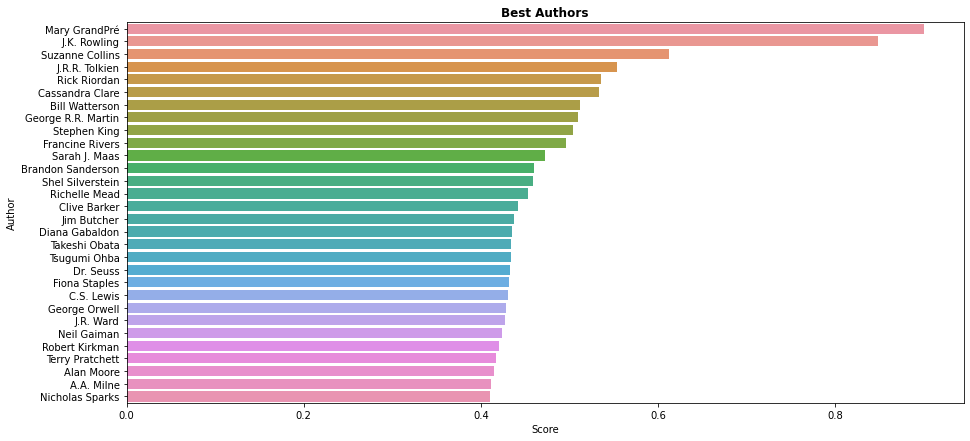

In [ ]:
plot_authors_by(best_authors, 'Best Authors', 'Score', 30)

As we know that **Mary GrandPré** is an illustrator, so we can consider that **J.K. Rowling** is the best author for her fantastic *Harry Potter* Series (that also achieved the best scored books above). 

## *Ratings*<a id="24"></a> <br>

In [ ]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [ ]:
print('There are {} ratings.'.format(ratings.shape[0]))

There are 981756 ratings.


In [ ]:
print('Number of users is {}'.format(len(ratings.user_id.unique())))

Number of users is 53424


### Remove Duplicates Ratings<a id="25"></a> <br>

In [ ]:
ratings[ratings.duplicated()==True]

,book_id,user_id,rating
1171,12,40251,4
2474,25,32635,5
2959,30,31760,4
3020,31,8669,5
3334,34,26097,1
...,...,...,...
979373,9975,3133,3
980520,9988,907,4
981044,9993,33994,4
981257,9995,28898,2


In [ ]:
ratings[ratings.duplicated(keep=False)==True].head(6)

,book_id,user_id,rating
1170,12,40251,4
1171,12,40251,4
2473,25,32635,5
2474,25,32635,5
2958,30,31760,4
2959,30,31760,4


In [ ]:
ratings_rmv_duplicates = ratings.drop_duplicates()
ratings_rmv_duplicates.shape

(980112, 3)

To reduce calculation times, I select only a subset of users. (e.g., 20%)

In [ ]:
ratings_sample = ratings_rmv_duplicates.sample(frac=0.2)
ratings_sample.shape

(196022, 3)

### - What is the distribution of the ratings?<a id="26"></a> <br>

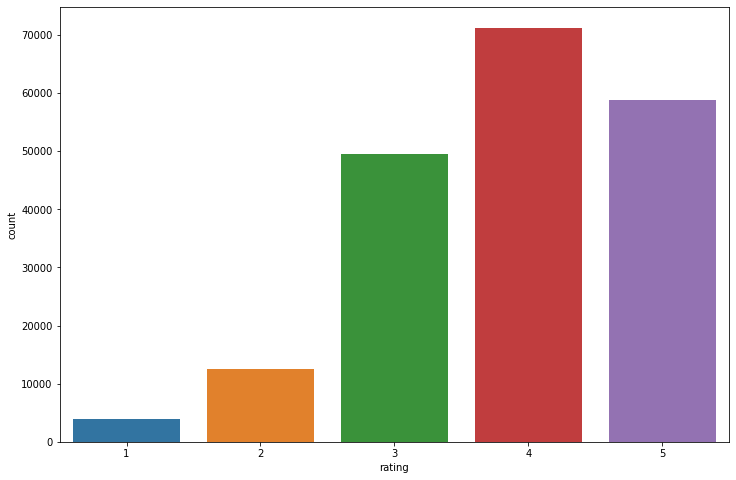

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='rating', data=ratings_sample);

We see that people tend to give quite positive ratings to books. Most of the ratings are in the 3-5 range, while very few ratings are in the 1-2 range.

### - Number of ratings per user<a id="27"></a> <br>

In [ ]:
ratings_per_user = ratings_sample.groupby('user_id')['user_id'].count()
ratings_per_user

user_id
3         1
5         1
6         1
7        14
9         3
         ..
53419     1
53420     2
53421     2
53422     4
53424     1
Name: user_id, Length: 40373, dtype: int64

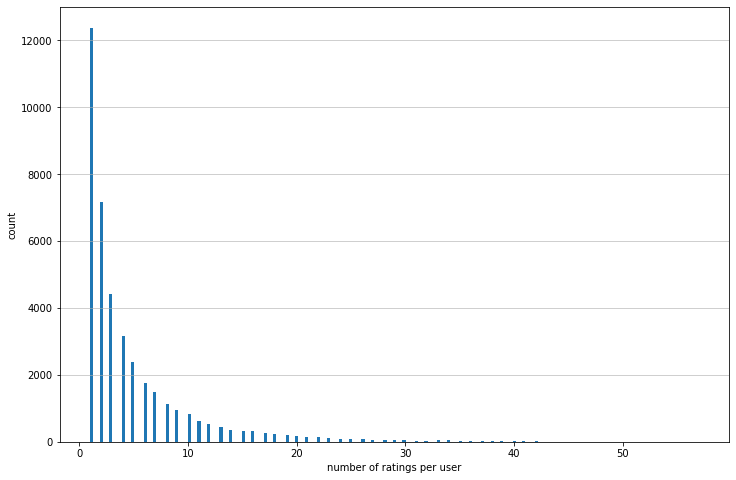

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(ratings_per_user ,bins='auto');
plt.grid(axis='y', alpha=0.75)
plt.xlabel('number of ratings per user')
plt.ylabel('count');

We can see that there are some users with many ratings. This is interesting, because we can later examine whether frequent raters rate books differently from less frequent raters. We will come back to this later.

### - Distribution of mean user rating<a id="28"></a> <br>

In [ ]:
mean_rating_per_user = ratings_sample.groupby('user_id')['rating'].mean()
mean_rating_per_user

user_id
3        1.000000
5        4.000000
6        4.000000
7        3.500000
9        3.333333
           ...   
53419    4.000000
53420    4.000000
53421    5.000000
53422    4.250000
53424    4.000000
Name: rating, Length: 40373, dtype: float64

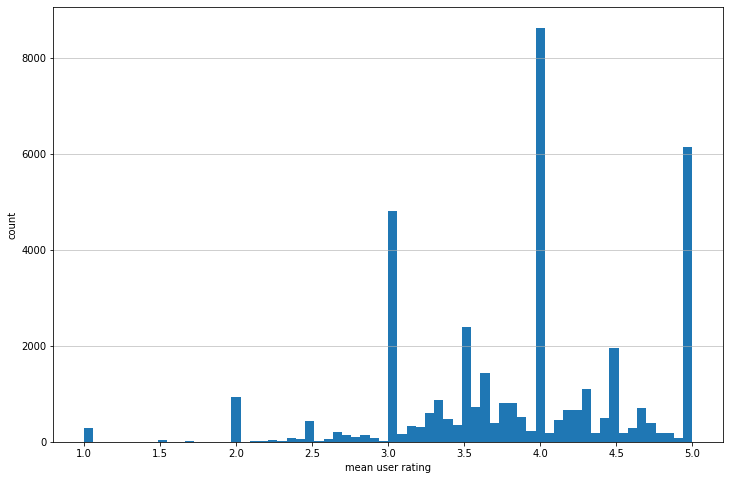

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(mean_rating_per_user, bins='auto');
plt.grid(axis='y', alpha=0.75)
plt.xlabel('mean user rating')
plt.ylabel('count');

People have different tendencies to rate books. Some already give 5 stars to a mediocre book, while others do not give 5 stars unless it is the perfect book for them. Such tendencies can be seen in the figure above. On the right side there is a bump from users with a mean rating of 5, indicating that they really liked all books (or they only rated books they really like…). We can also see that there are nearly no notoriuous downvoters rating all books with a 1. Such tendencies are going to be important for collaborative filtering later, and are typically dealt with by subtracting the user’s mean rating from their ratings.

### - Number of ratings per book<a id="29"></a> <br>

In [ ]:
ratings_per_book = ratings_sample.groupby('book_id')['book_id'].count()
ratings_per_book

book_id
1        20
2        23
3        20
4        23
5        25
         ..
9996     15
9997     20
9998     22
9999     20
10000    21
Name: book_id, Length: 9999, dtype: int64

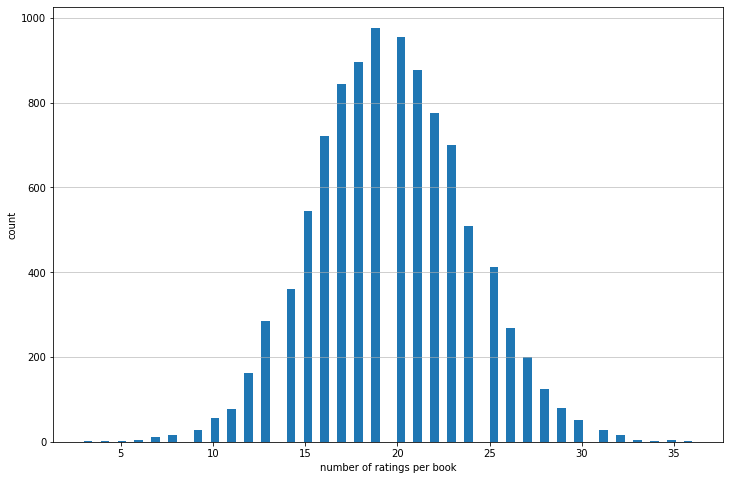

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(ratings_per_book ,bins='auto');
plt.grid(axis='y', alpha=0.75)
plt.xlabel('number of ratings per book')
plt.ylabel('count');

We can see that in the subsetted dataset most books have around 18-20 ratings.

### - Distribution of mean book ratings<a id="30"></a> <br>

In [ ]:
mean_rating_per_book = ratings_sample.groupby('book_id')['rating'].mean()
mean_rating_per_book

book_id
1        4.100000
2        4.260870
3        3.100000
4        4.521739
5        3.880000
           ...   
9996     3.933333
9997     4.500000
9998     4.500000
9999     3.950000
10000    4.285714
Name: rating, Length: 9999, dtype: float64

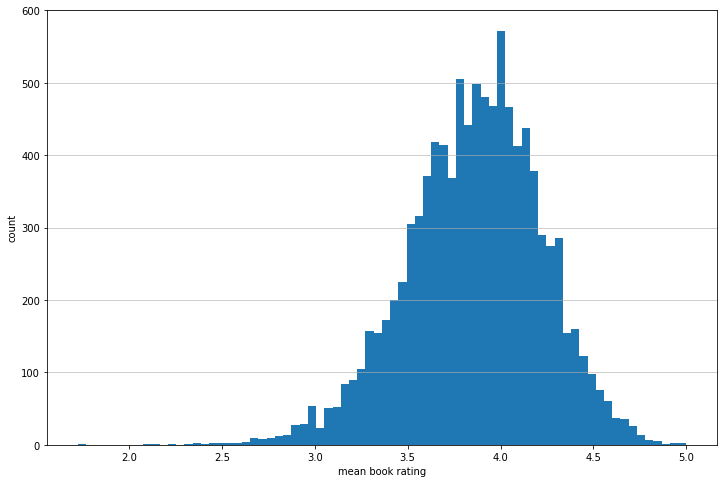

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(mean_rating_per_book, bins='auto');
plt.grid(axis='y', alpha=0.75)
plt.xlabel('mean book rating')
plt.ylabel('count');

Mean book ratings don’t reveal any peculiarities.

---

## *Tags*<a id="31"></a> <br>


In [ ]:
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [ ]:
tags.shape

(34252, 2)

In [ ]:
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [ ]:
book_tags.shape

(999912, 3)

In [ ]:
genres = ["Art", "Biography", "Business", "Chick Lit", "Children's", "Christian", "Classics",
          "Comics", "Contemporary", "Cookbooks", "Crime", "Ebooks", "Fantasy", "Fiction",
          "Gay and Lesbian", "Graphic Novels", "Historical Fiction", "History", "Horror",
          "Humor and Comedy", "Manga", "Memoir", "Music", "Mystery", "Nonfiction", "Paranormal",
          "Philosophy", "Poetry", "Psychology", "Religion", "Romance", "Science", "Science Fiction", 
          "Self Help", "Suspense", "Spirituality", "Sports", "Thriller", "Travel", "Young Adult"]

In [ ]:
genres = list(map(str.lower, genres))
genres[:4]

['art', 'biography', 'business', 'chick lit']

In [ ]:
available_genres = tags.loc[tags.tag_name.str.lower().isin(genres)]

In [ ]:
print('Number of available tags is {} out of the {} tags in genres list'.format(available_genres.shape[0], len(genres)))

Number of available tags is 31 out of the 40 tags in genres list


In [ ]:
available_books_with_genres = book_tags[book_tags.tag_id.isin(available_genres.tag_id)]
available_books_with_genres.shape

(60573, 3)

In [ ]:
tag_counts = pd.DataFrame(available_books_with_genres.groupby('tag_id')['count'].sum())
tag_counts.head()

,count
tag_id,
2938,30262
4605,172444
5951,73249
7077,53864
7457,1756920


In [ ]:
tag_counts.set_index(available_genres.tag_name, inplace=True)
tag_counts.head()

,count
tag_name,
art,30262
biography,172444
business,73249
christian,53864
classics,1756920


In [ ]:
tag_counts.sort_values('count', ascending=False, inplace=True)
tag_counts.head()

,count
tag_name,
fiction,3688819
fantasy,3548157
classics,1756920
romance,1231926
mystery,872282


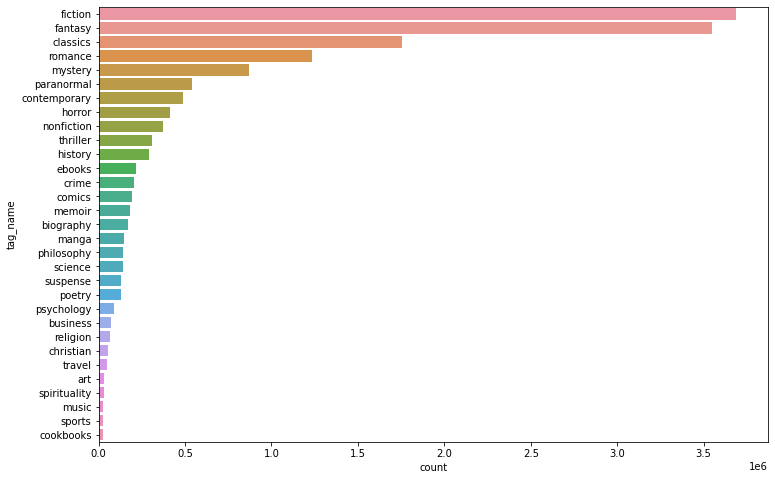

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x='count', y=tag_counts.index, data=tag_counts, orient='h');

We see that most books are “Fantasy”, “Romance”, or “Mistery” books, while there are not very many “Cookbooks” in the database.

### What influences a book’s rating?<a id="32"></a> <br>

#### Correlation

In [ ]:
cols = ['books_count','original_publication_year','average_rating','ratings_count','work_ratings_count','work_text_reviews_count']

In [ ]:
corr = books[cols].corr()
corr

,books_count,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count
books_count,1.000000,-0.319824,-0.070328,0.332126,0.340896,0.200937
original_publication_year,-0.319824,1.000000,0.019832,-0.023279,-0.024258,0.028372
average_rating,-0.070328,0.019832,1.000000,0.053536,0.053795,0.013040
ratings_count,0.332126,-0.023279,0.053536,1.000000,0.995099,0.783875
work_ratings_count,0.340896,-0.024258,0.053795,0.995099,1.000000,0.810950
work_text_reviews_count,0.200937,0.028372,0.013040,0.783875,0.810950,1.000000


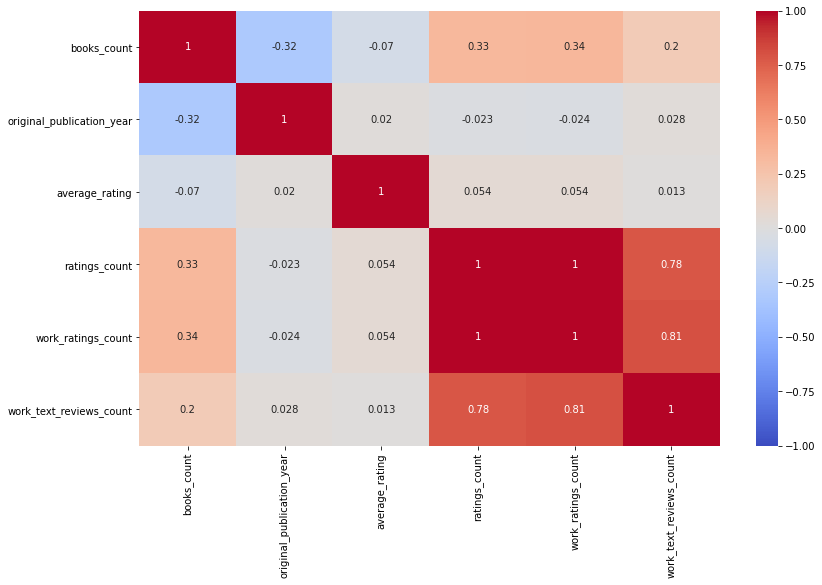

In [ ]:
plt.figure(figsize=(13,8))
sns.heatmap(corr, vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm', annot=True);

#### Removing the Duplicate Top-Half

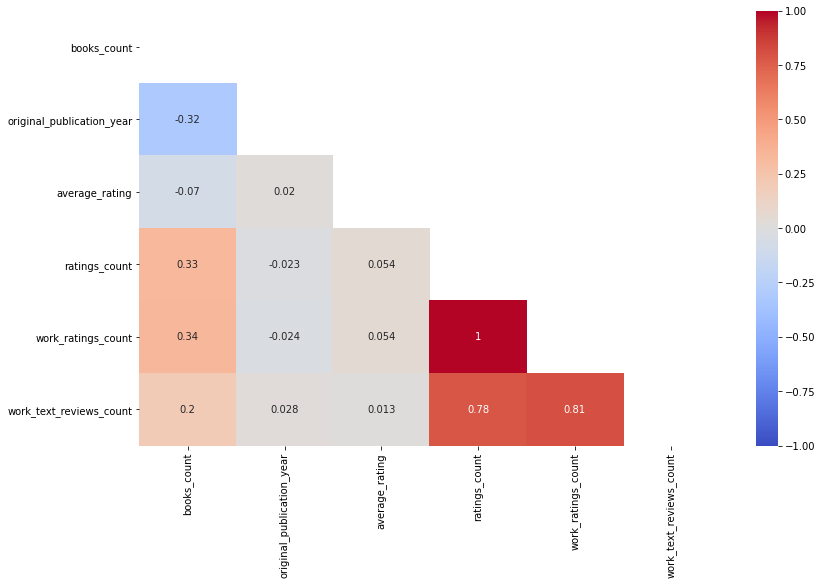

In [ ]:
mask = np.zeros(corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True

plt.figure(figsize=(13,8))
sns.heatmap(corr, vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm', annot = True, mask = mask);

### - Is there a relationship between the number of ratings and the average rating?<a id="33"></a> <br>

AttributeError: ignored

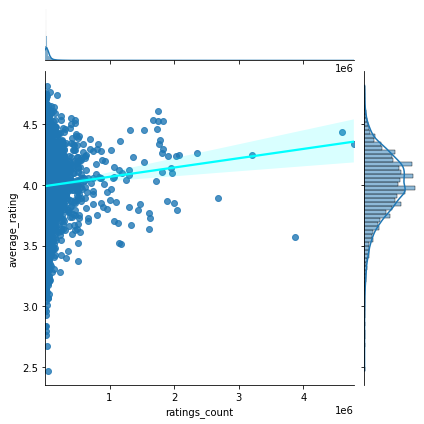

In [ ]:
jp = sns.jointplot(x='ratings_count', y='average_rating', kind='reg', line_kws={'color':'cyan'}, data=books)
jp.annotate(stats.pearsonr, fontsize=12);

Theoretically, it might be that the popularity of a book (in terms of the number of ratings it receives) is associated with the average rating it receives, such that once a book is becoming popular it gets better ratings. However, our data shows that this is true only to a very small extent. The correlation between these variables is only 0.045.

### - Multiple editions of each book<a id="34"></a> <br>

In [ ]:
jp = sns.jointplot(x='books_count', y='average_rating', kind='reg', line_kws={'color':'cyan'}, data=books)
jp.annotate(stats.pearsonr, fontsize=12);

### - Do frequent raters rate differently?<a id="35"></a> <br>

In [ ]:
jp = sns.jointplot(x=ratings.groupby('user_id')['user_id'].count(),
                   y=ratings.groupby('user_id')['rating'].mean(),
                   kind='reg', line_kws={'color':'cyan'})
jp.annotate(stats.pearsonr, fontsize=12);
plt.xlabel('number_of_rated_books');
plt.ylabel('mean_rating');

It is possible, that users that rate more books (frequent raters) rate books differently from less frequent raters. The figure above explores this possibility. It seems like frequent raters tend to give lower ratings to books, maybe they are/become more critical the more they read and rate. That’s interesting.

### - Series of Books<a id="36"></a> <br>

The data contains information in the title column about whether a certain book is part of a series (e.g. the Lord of the Rings trilogy).

In [ ]:
subtitle = 'the lord of the rings'
books[books.title.str.lower().str.find(subtitle) > -1][['title']].values

With some exploration through the data I have found some **patterns** in *titles* :

```
(Private, #1)
(Ex-Heroes, #1)
(Forgotten Realms: The Dark Elf Trilogy, #1; Legend of Drizzt, #1)
(The Mortal Instruments #1-4)
(New Tales of the Vampires)
```

Below, I examine whether books which are part of a larger series receive a higher rating. In fact the more volumes are in a series, the higher the average rating is.

In [ ]:
book_series = books[books.title.str.contains('\(.*[,:]') == True][['title', 'average_rating']]

In [ ]:
print('There are {} books that are in series'.format(book_series.shape[0]))

In [ ]:
book_series.head()

In [ ]:
series = book_series.copy()
series['title'] = series['title'].str.findall('\(.*[,:]').apply(lambda x: x.pop()[1:-1])

In [ ]:
series.head()

In [ ]:
jp = sns.jointplot(x=series.groupby('title')['title'].count(),
                   y=series.groupby('title')['average_rating'].mean(),
                   kind='reg', line_kws={'color':'cyan'})
jp.annotate(stats.pearsonr, fontsize=12);
plt.xlabel('number_of_volumes_in_series');
plt.ylabel('mean_rating');

### - How long should a title be?<a id="37"></a> <br>

If you are an author, one of the most important choices is the title of a book. Of course the content of the title is important. However, it might also matter how long the title is. Below I therefore plot the average rating as a function of the length of the title (in words). We can see that there is in fact some variation in average rating depending on title length. Titles with 5 or 10 words seem to have slightly higher ratings.

In [ ]:
title_length = books[['title', 'average_rating']]
title_length['length'] = title_length['title'].str.findall('\s').apply(lambda x: len(x)+1)

In [ ]:
title_length.head()

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='length', y='average_rating', data=title_length);
plt.xlabel('title_length');
plt.grid()

### - Does having a subtitle improve the book’s rating?<a id="38"></a> <br>

In [ ]:
has_subtitle = books[['title', 'average_rating']]
has_subtitle['has_subtitle'] = title_length['title'].str.contains(':', regex=False)

In [ ]:
has_subtitle.head()

In [ ]:
plt.figure(figsize=(6,8))
sns.boxplot(x='has_subtitle', y='average_rating', data=has_subtitle);
plt.grid()

We see that books that have a subtitle get rated slightly higher than books without a subtitle.

### - Does the number of authors matter?<a id="39"></a> <br>

In [ ]:
n_of_authors = books.authors.apply(lambda x: len(x.split(',')))

In [ ]:
plt.figure(figsize=(8,7))
jp = sns.regplot(x=n_of_authors, y=books['average_rating'], line_kws={'color':'cyan'})
jp.annotate('r =' + str(round(stats.pearsonr(n_of_authors,books['average_rating'])[0], 3)),
            xy=(20,3), fontsize=15);
plt.xlabel('number_of_authors');


We all know the saying: “too many cooks spoil the broth.” Is this also true for books? Looking at the plot above it seems to be exactly the opposite: The more authors a book has the higher is its average rating.